In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/jordancsibley/eds220-hwk2

- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

Text(0.5, 0, 'Commercial catches of salmon species (in thousands of fish)')

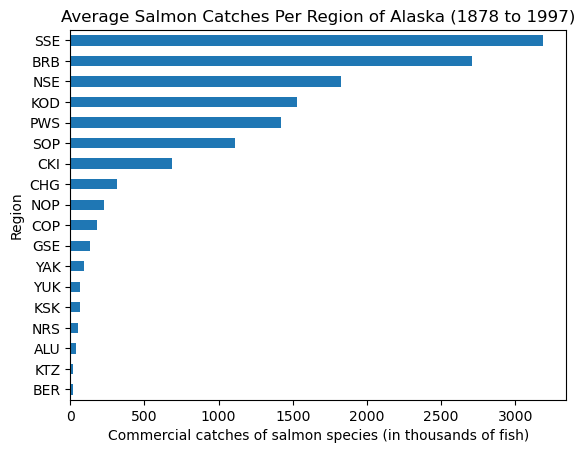

In [16]:
# FINAL CODE

# Import `Pandas`
import pandas as pd

# Read in Salmon dataset, remove notes column, and update 'I' value to '1' 
catch_data = pd.read_csv('data/salmon_data.csv').drop('notesRegCode',  axis=1)

# Update the value of row 400 from I to 1 
catch_data.at[400, 'Catch'] = 1

# Update the 'Catch' column from object to interger
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Create new data frame that includes average catch per region 
avg_region = (catch_data.groupby('Region')
                        .Catch
                        .mean()
                        .rename('avg_catch')
                        .reset_index()# Converts series back to data frame
                        .sort_values(by='avg_catch', ascending=True) # Orders by ascending catch values
                        .set_index('Region')) # Sets the index by the region 

# Create bar graph of average catchs per region 
ax= avg_region.plot(kind='barh',
                    title='Average Salmon Catches Per Region of Alaska (1878 to 1997)',
                    legend=False)
# Set axis labels 
ax.set_ylabel(ylabel='Region')
ax.set_xlabel(xlabel='Commercial catches of salmon species (in thousands of fish)')    

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [17]:
# a.

# Import `Pandas`
import pandas as pd

# Read in Salmon dataset 
catch_data = pd.read_csv('data/salmon_data.csv')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [18]:
# b.

# View the top rows of the salmon catch data 
print("Head of dataframe:\n", catch_data.head(3))

# View the data types of the columns 
print("\nColumn data types:\n", catch_data.dtypes)

# View the unique values of the categorical variable Region 
print("\nRegion unique value counts:\n", catch_data['Region'].value_counts())

# View the unique values of the categorical variable Species
print("\nSpecies unique value counts:\n", catch_data['Species'].value_counts())

Head of dataframe:
   Region  Year notesRegCode  Species Catch
0    SSE  1886          NaN  Chinook     0
1    SSE  1887          NaN  Chinook     0
2    SSE  1888          NaN  Chinook     0

Column data types:
 Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object

Region unique value counts:
 KOD    580
NSE    575
BRB    570
SSE    560
CHG    550
PWS    545
CKI    525
BER    510
YAK    480
COP    470
NOP    460
SOP    450
ALU    435
KSK    425
KTZ    415
GSE    410
YUK    395
NRS    185
Name: Region, dtype: int64

Species unique value counts:
 Chinook    1708
Sockeye    1708
Coho       1708
Pink       1708
Chum       1708
Name: Species, dtype: int64


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

Above, I decided to first use the method `.head()` to view the first five rows to give me a better sense of what is included in this dataframe. Then I wanted to know the type of data of each of the columns so I used the dataframe attribute `.dtypes`. Finally, I wanted to know the unique values and their counts of the columns 'Region' and 'Species' as I feel they will be important later on. 

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [19]:
# Access the unique values of the notes column 
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [20]:
# Remove the notes column of the catch_data dataframe
catch_data = catch_data.drop('notesRegCode',  axis=1)

# Verify that the column was dropped 
catch_data.head(5)

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0


<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


After accessing the data types of each column, it seems that 'Region' and 'Species' are correctly labeled as objects, meaning they are likely categorical data. However, the 'Catch' column is also an object when it would make more sense for it to a numerical data type. The column 'Year' is currently a interger data type, which could be ok depending on certain purposes, but it might be better to be in data time form. 

In [21]:
# Obtain the data types of each column 
print(catch_data.dtypes)

Region     object
Year        int64
Species    object
Catch      object
dtype: object


<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [8]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [22]:
# Filter rows to those that contain the letter 'I'
catch_I = catch_data[catch_data['Catch'].str.contains('I', na=False)]
catch_I 

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [23]:
# Confirm that row 400 contains the letter I
print(catch_data.at[400, 'Catch'])

# Update the value of row 400 from I to 1 
catch_data.at[400, 'Catch'] = 1

# Assign this row to catch_1
catch_1 = catch_data.loc[400, ]
catch_1

I


Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [41]:
# Update the 'Catch' column from object to interger
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Access the updated data types 
catch_column_type = catch_data['Catch'].dtypes
catch_column_type

dtype('int64')

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [42]:
# Create new series (for the autograder) that includes average catch per region 
avg_region = catch_data.groupby('Region')['Catch'].mean()
              
avg_region

Region
ALU      40.383908
BER      16.372549
BRB    2709.796491
CHG     315.487273
CKI     683.571429
COP     179.223404
GSE     133.841463
KOD    1528.350000
KSK      67.642353
KTZ      18.836145
NOP     229.493478
NRS      51.502703
NSE    1825.020870
PWS    1419.236697
SOP    1110.942222
SSE    3184.660714
YAK      91.922917
YUK      68.645570
Name: Catch, dtype: float64

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

Text(0.5, 0, 'Commercial catches of salmon species (in thousands of fish)')

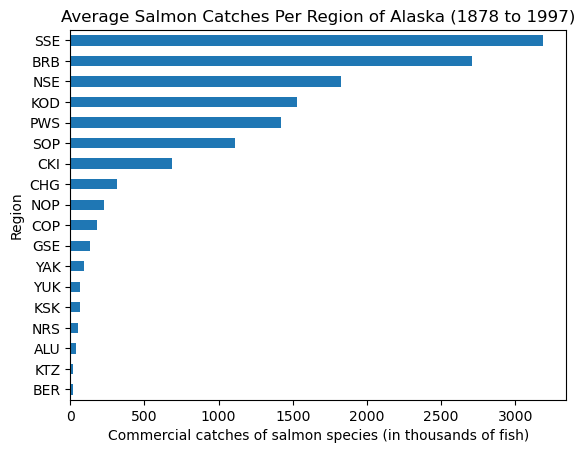

In [40]:
# Set up data frame for bar graph 
avg_region_sorted = (catch_data.groupby('Region')
                                .Catch
                                .mean()
                                .rename('avg_catch')
                                .reset_index()# Converts series back to data frame
                                .sort_values(by='avg_catch', ascending=True) # Orders by ascending catch values
                                .set_index('Region')) # Sets the index by the region

# Create bar graph of average catchs per region 
ax= avg_region_sorted.plot(kind='barh',
                    title='Average Salmon Catches Per Region of Alaska (1878 to 1997)',
                    legend=False)
# Set axis labels 
ax.set_ylabel(ylabel='Region')
ax.set_xlabel(xlabel='Commercial catches of salmon species (in thousands of fish)')    

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

Based on the plot above, it seems that the majority of the regions have catches of salmon below 2,000,000 fish. The top two regions, Southern Southeast Alaska and Bristol Bay Management Area have well over 2,500,000 commercial catches. They are definitely the most dominate groups in the Alaskan salmon fishery. 

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).